<a href="https://colab.research.google.com/github/AnushaVelumani/cmpe255-spring19/blob/master/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]%2
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]%2

In [36]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int8))

In [37]:
mnist.data.shape


(70000, 784)

In [0]:
X, y = mnist["data"], mnist["target"]
X.shape
X_train, X_test, y_train,y_test = X[:60000], X[:60000], y[:60000], y[:60000]

In [39]:
y.shape

(70000,)

In [40]:
28*28

784

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=10, tol=1e-3, random_state=42,learning_rate='optimal', eta0=0.0,)
sgd_clf.fit(X_train, y_train)
predicted = sgd_clf.predict(X_test)
accuracy_score(y_test,predicted)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.8722666666666666

In [62]:
print("odd = array[1], even = array[1]")

odd = array[1], even = array[1]


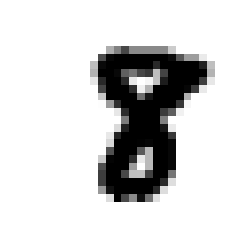

array([0], dtype=int8)

In [61]:

some_digit = X_test[49990]

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

sgd_clf.predict([some_digit])



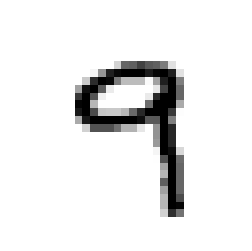

array([1], dtype=int8)

In [60]:
some_digit = X[5700]

some_digit_image = some_digit_even.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

sgd_clf.predict([some_digit])

In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, predicted)

array([[24590,  4902],
       [ 2762, 27746]])

In [72]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, predicted)

0.8498529772114678

In [73]:
recall_score(y_train, predicted)

0.9094663694768585

In [74]:
from sklearn.metrics import f1_score
f1_score(y_train, predicted)

0.8786496928241181

In [63]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [64]:

knn_clf.predict([some_digit])

array([[False, False]])